### Libraries

In [17]:
import pandas as pd
import numpy as np
from scipy.io import arff
import seaborn as sns
import matplotlib.pyplot as plt
import openml
import time
#our neural network
from neuralnetwork import Network,FCLayer,ActivationLayer,sigmoid,sigmoid_prime,tanh,tanh_prime,categorical_cross_entropy,categorical_cross_entropy_prime,mse,mse_prime,binary_cross_entropy,binary_cross_entropy_prime,relu,relu_prime

#sklearn
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split 
from sklearn.metrics import recall_score,accuracy_score,confusion_matrix, ConfusionMatrixDisplay, precision_score, make_scorer
import itertools
from sklearn.model_selection import KFold
# from sklearn.model_selection import GridSearchCV,KFold,cross_val_score
import itertools
from sklearn.preprocessing import StandardScaler,MinMaxScaler

from neuralnetwork import Network,FCLayer,ActivationLayer
from neuralnetwork import sigmoid,sigmoid_prime,tanh,tanh_prime,categorical_cross_entropy,categorical_cross_entropy_prime,mse,mse_prime,softmax,softmax_prime


### Data

In [3]:
cols = ['class', 'Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash', 'Magnesium', 'Total phenols', 'Flavanoids',
        'Nonflavanoid phenols', 'Proanthocyanins', 'Color intensity', 'Hue', 'OD280/OD315 of diluted wines', 'Proline']

df_wine = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data', names=cols)

In [4]:
# Number of samples and number of attributes
num_samples = df_wine.shape[0]
num_attributes = df_wine.shape[1] - 1 # first one is the class annotation
print("The number of samples is: ", str(num_samples))
print("The number of attributes is: ", str(num_attributes))

The number of samples is:  178
The number of attributes is:  13


In [5]:
#Counting the number of samples for each class
wine = df_wine.to_numpy()
num_class_1 = sum(wine[:, 0] == 1)
num_class_2 = sum(wine[:, 0] == 2)
num_class_3 = sum(wine[:, 0] == 3)

print("Number of samples that belong to class 1: ", str(num_class_1))
print("Number of samples that belong to class 2: ", str(num_class_2))
print("Number of samples that belong to class 3: ", str(num_class_3))

Number of samples that belong to class 1:  59
Number of samples that belong to class 2:  71
Number of samples that belong to class 3:  48


### Preparing data for the model

In [6]:
X = df_wine.drop(['class'], axis=1).to_numpy()
Y = df_wine['class']

In [7]:
encoder = OneHotEncoder(sparse = False)
y_reshaped = Y.to_numpy().reshape(-1,1)
y_encoded = encoder.fit_transform(y_reshaped)

#splitting into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=1234)

#splitting into train and validation set
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1,random_state = 1234)


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Preprocessing the data using StandardScaler

In [8]:
scaler = StandardScaler()
X_train_standardized = scaler.fit_transform(X_train)
X_test_standardized = scaler.transform(X_test)
X_val_standardized = scaler.transform(X_val)

### Our Neural Network

#### Neural Network with tanh activation in the hidden layers and softmax in the outer layer
As softmax should be applied to the outer layer only, we will use tanh for the other hidden layers

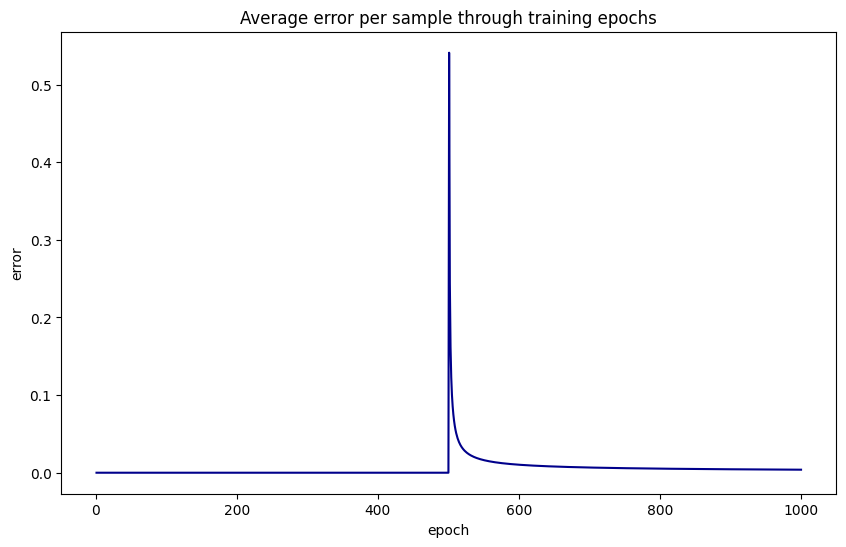

In [28]:
seed = 1234
# network with 2 layers
net_tan = Network()
net_tan.add(FCLayer(13, 10,seed = seed))  
net_tan.add(ActivationLayer(tanh, tanh_prime))
net_tan.add(FCLayer(10,3,seed = seed))  
net_tan.add(ActivationLayer(softmax, softmax_prime))

# train
net_tan.use(categorical_cross_entropy, categorical_cross_entropy_prime)

err_vect_tan = net_tan.fit(X_train_standardized, y_train, epochs=500, learning_rate=0.1)
net_tan.plot_error_curve(err_vect_tan)

##################################################
Accuracy on train:  1.0
Accuracy on test:  0.9333333333333333
##################################################
Recall on train:  1.0
Recall on test:  0.9333333333333333
##################################################
Precision on train:  1.0
Precision on test:  0.9333333333333333
##################################################


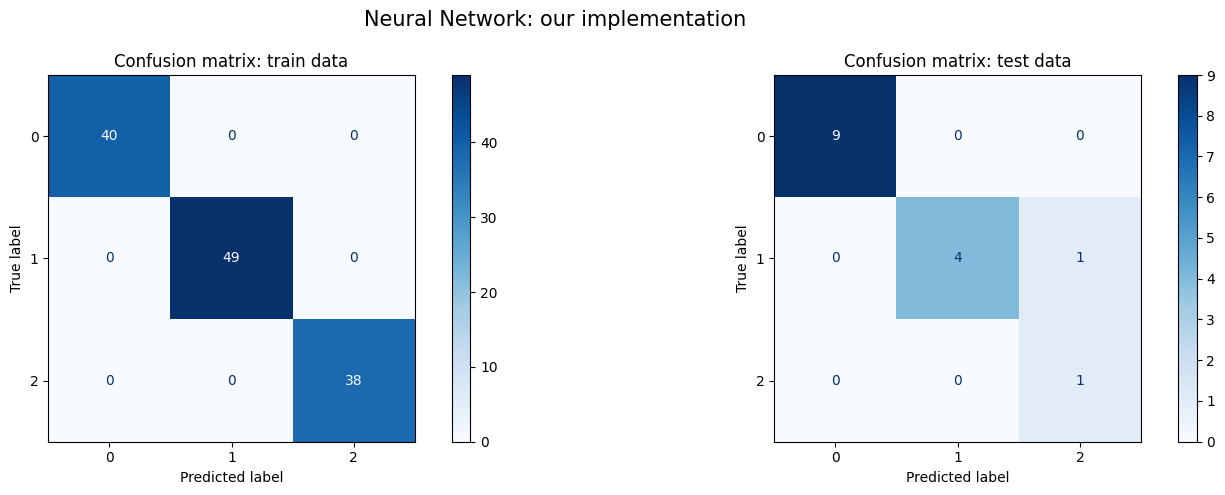

In [29]:
net_tan.nn_evaluate_one_hot(x_train= X_train_standardized, y_train=y_train, x_test=X_val_standardized, y_test=y_val, epochs=500, learning_rate=0.1)

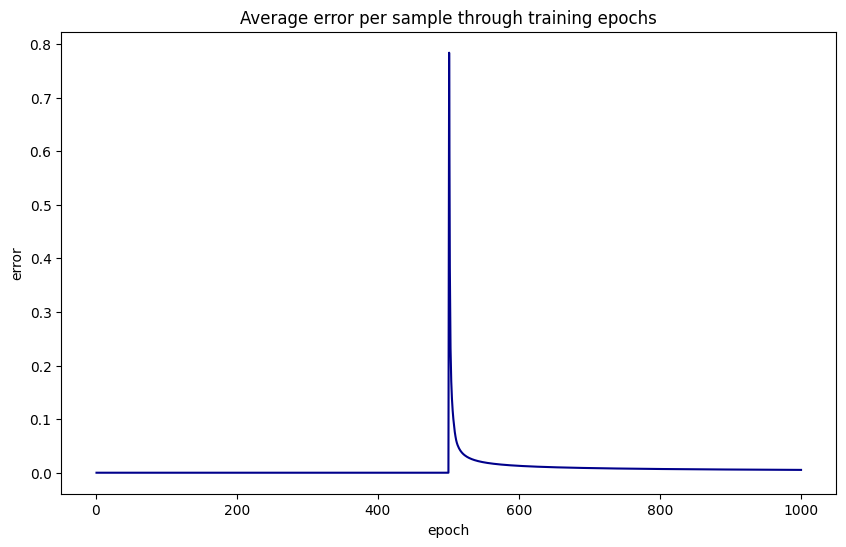

In [16]:
# network with 3 layers
net_tan= Network()
net_tan.add(FCLayer(13, 8,seed = seed))  
net_tan.add(ActivationLayer(tanh, tanh_prime))
net_tan.add(FCLayer(8,5,seed = seed))  
net_tan.add(ActivationLayer(tanh, tanh_prime))
net_tan.add(FCLayer(5, 3,seed = seed))  
net_tan.add(ActivationLayer(softmax, softmax_prime))

# train
net_tan.use(categorical_cross_entropy, categorical_cross_entropy_prime)

err_vect_tan = net_tan.fit(X_train_standardized, y_train, epochs=500, learning_rate=0.1)
net_tan.plot_error_curve(err_vect_tan)

##################################################
Accuracy on train:  1.0
Accuracy on test:  1.0
##################################################
Recall on train:  1.0
Recall on test:  1.0
##################################################
Precision on train:  1.0
Precision on test:  1.0
##################################################


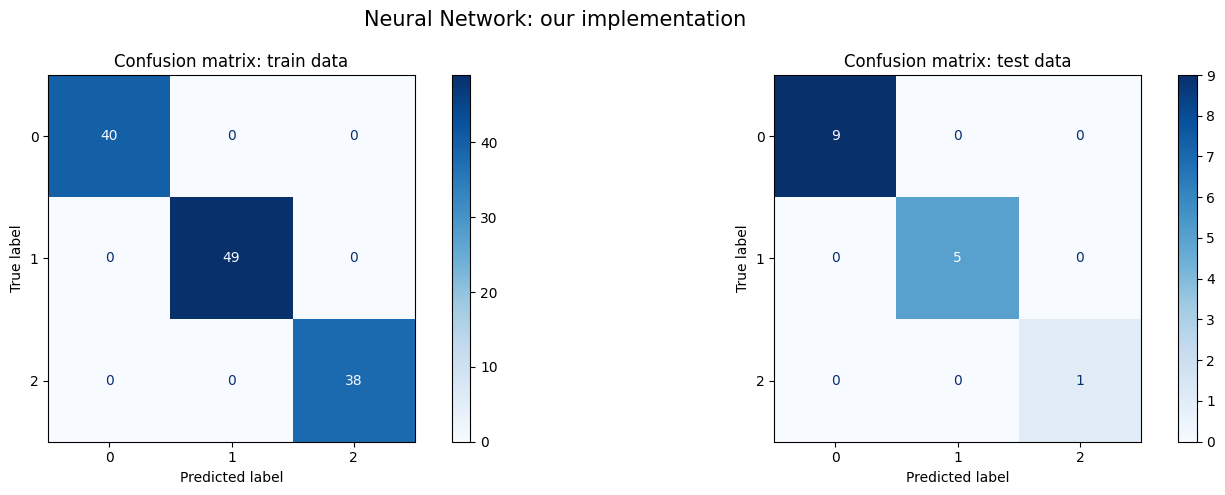

In [19]:
net_tan.nn_evaluate_one_hot(x_train= X_train_standardized, y_train=y_train, x_test=X_val_standardized, y_test=y_val, epochs=500, learning_rate=0.1)

#### Neural Network  with softmax  in the outer layer only


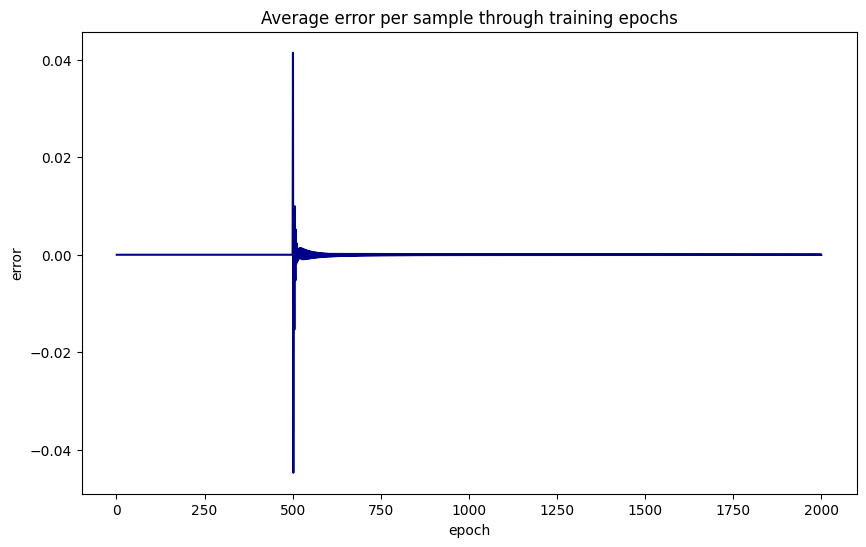

In [18]:
#network with 2 layers
net_soft = Network()
net_soft.add(FCLayer(13, 8,seed = seed))  
net_soft.add(FCLayer(8, 3,seed = seed))  
net_soft.add(ActivationLayer(softmax, softmax_prime))

# train
net_soft.use(categorical_cross_entropy_prime, categorical_cross_entropy_prime)

err_vect_soft = net_soft.fit(X_train_standardized, y_train, epochs = 500,learning_rate=0.1)
net_soft.plot_error_curve(err_vect_soft)

##################################################
Accuracy on train:  1.0
Accuracy on test:  1.0
##################################################
Recall on train:  1.0
Recall on test:  1.0
##################################################
Precision on train:  1.0
Precision on test:  1.0
##################################################


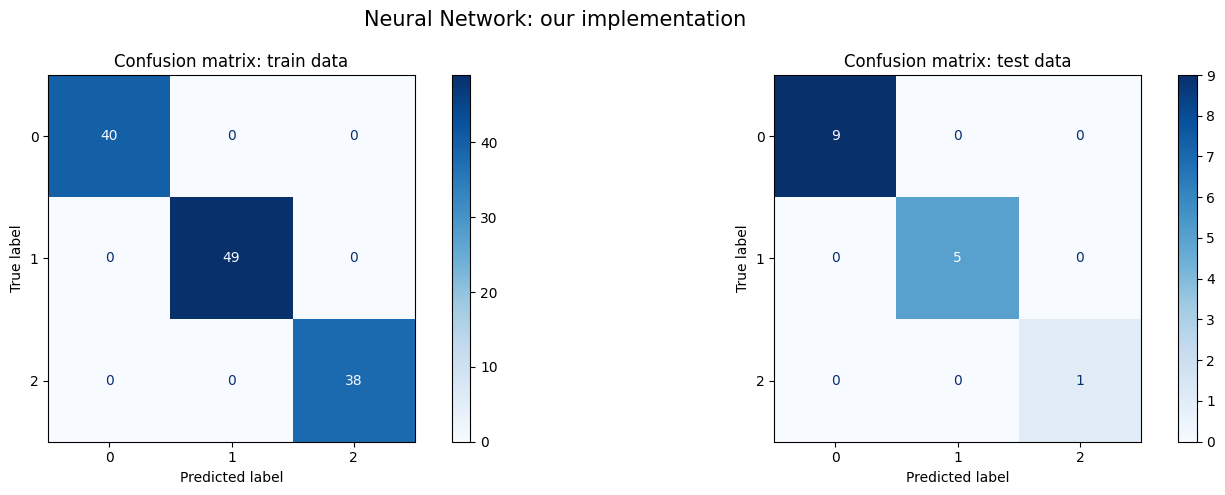

In [22]:
net_soft.nn_evaluate_one_hot(x_train= X_train_standardized, y_train=y_train, x_test=X_val_standardized, y_test=y_val, epochs=500, learning_rate=0.1)

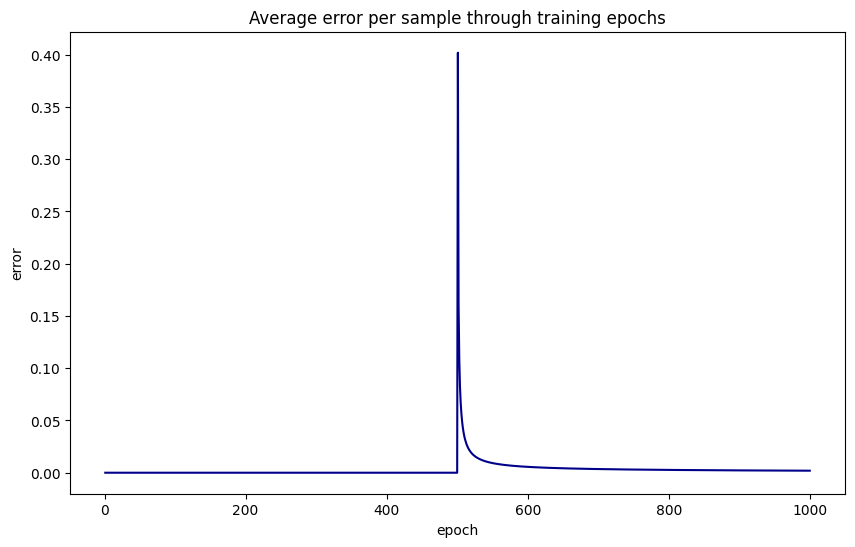

In [39]:
#network with 3 layers
net_soft = Network()
net_soft.add(FCLayer(13, 8,seed = seed))  
net_soft.add(FCLayer(8, 3,seed = seed))  
net_soft.add(ActivationLayer(softmax, softmax_prime))

# train
net_soft.use(categorical_cross_entropy, categorical_cross_entropy_prime)

err_vect_soft = net_soft.fit(X_train_standardized, y_train, epochs=500, learning_rate=0.1)
net_soft.plot_error_curve(err_vect_soft)

##################################################
Accuracy on train:  1.0
Accuracy on test:  1.0
##################################################
Recall on train:  1.0
Recall on test:  1.0
##################################################
Precision on train:  1.0
Precision on test:  1.0
##################################################


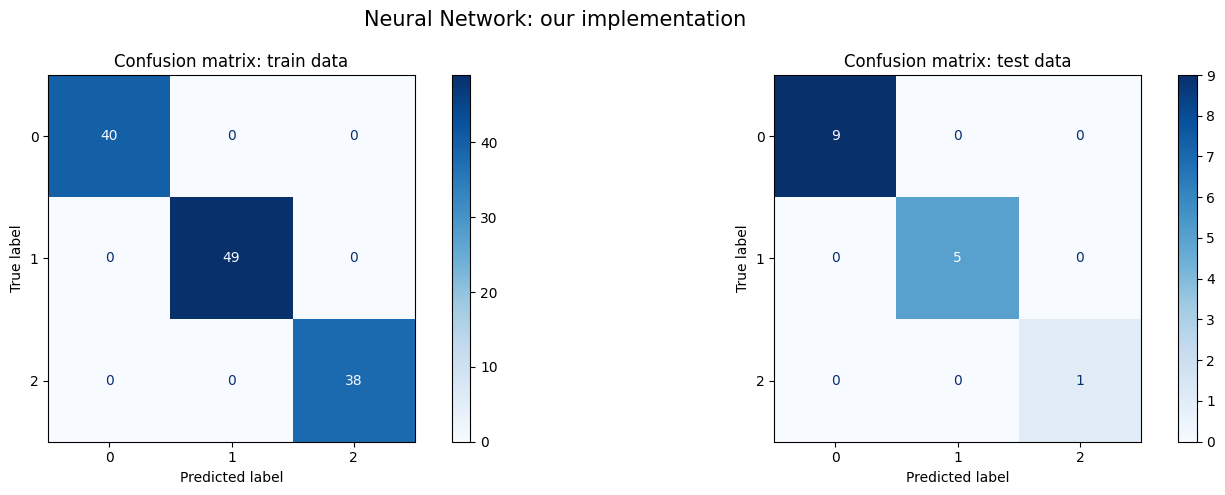

In [40]:
net_soft.nn_evaluate_one_hot(x_train= X_train_standardized, y_train=y_train, x_test=X_val_standardized, y_test=y_val, epochs=500, learning_rate=0.1)

#### Cross validation to find the best number of nodes and layers

In [55]:
# Defining the parameters
node_numbers = [5,10,15]
layer_numbers = [2,3,4]
activation = ['softmax','tanh']
input_size = 13
output_size = 3
seed = 1234

In [56]:
start = time.time()
accuracy_dict = {}
# Perform cross-validation for each hyperparameter combination
for nodes, layers,activation in itertools.product(node_numbers, layer_numbers, activation):
    # Initialize an array to store the performance metrics for each fold
    accuracy_scores = []
    # Create a KFold instance
    kf = KFold(n_splits=10, shuffle=True,random_state = 1234)

    # Iterate over the folds
    for train_index, val_index in kf.split(X_train):
        # Split the data into training and validation sets
        X_train_fold, X_val_fold = X_train[train_index], X_train[val_index]
        y_train_fold, y_val_fold = y_train[train_index], y_train[val_index]
        
        #scaling data after splitting
        X_train_fold = scaler.fit_transform(X_train_fold)
        X_val_fold = scaler.transform(X_val_fold)

        # Initialize and train your neural network with the current hyperparameters
        net = Network()
        net.add(FCLayer(input_size, nodes,seed = seed))
        if activation == 'softmax':
            for _ in range(layers - 1):
                net.add(FCLayer(nodes, nodes,seed = seed))
        else:
            for _ in range(layers - 1):
                net.add(FCLayer(nodes, nodes,seed = seed))
                net.add(ActivationLayer(tanh, tanh_prime))
        net.add(FCLayer(nodes, output_size,seed = seed))
        net.add(ActivationLayer(softmax, softmax_prime))
        net.use(categorical_cross_entropy, categorical_cross_entropy_prime)

        # # Train the network
        net.fit(X_train_fold, y_train_fold, epochs=200, learning_rate=0.1)
        y_val_pred = net.predict(X_val_fold)
        y_val_pred = np.concatenate(y_val_pred)

        # Convert one-hot encoded predictions back to class labels
        y_val_pred_labels = np.argmax(y_val_pred, axis=1)
        y_val_labels = np.argmax(y_val_fold, axis=1)

        accuracy = accuracy_score(y_val_labels,y_val_pred_labels)
        accuracy_scores.append(accuracy)

    accuracy_dict[(nodes, layers,activation)] = accuracy_scores
end = time.time()

print("Time needed to run cross validation for best number of layers and nodes "+ str((end-start)/60)+ " minutes.")

Time needed to run cross validation for best number of layers and nodes 15.302853413422902 minutes.


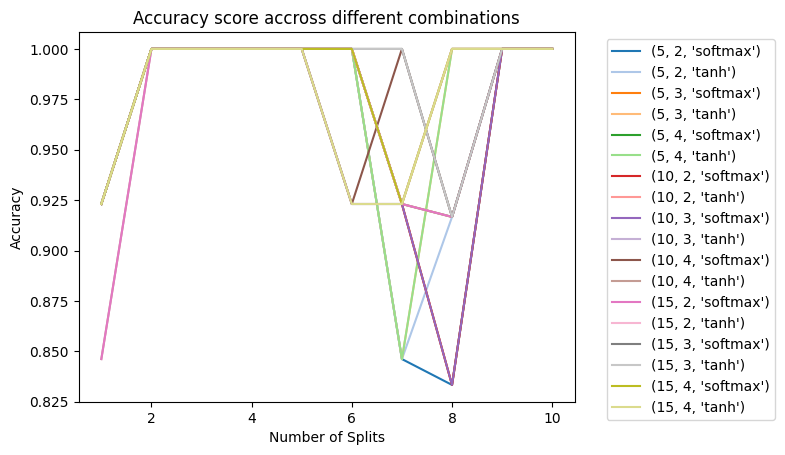

In [69]:
cmap = plt.get_cmap('tab20')
for i,c in enumerate(accuracy_dict):
   color = cmap(i)
   plt.plot(np.arange(1, len(accuracy_dict[c])+1, 1), accuracy_dict[c], '-', label=str(c),color = color)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title("Accuracy score accross different combinations")
plt.ylabel('Accuracy')
plt.xlabel('Number of Splits')
plt.show()

In [73]:
accuracy_dict_df = pd.DataFrame(accuracy_dict)
accuracy_dict_df

5                                                           10  \
          2                   3                   4                   2   
    softmax      tanh   softmax      tanh   softmax      tanh   softmax   
0  0.923077  0.923077  0.923077  0.923077  0.923077  0.923077  0.923077   
1  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
2  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
3  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
4  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
5  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
6  0.846154  0.846154  0.923077  0.846154  0.923077  0.846154  0.923077   
7  0.833333  0.916667  0.833333  1.000000  0.916667  1.000000  0.833333   
8  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
9  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   

                                                           15            \
                    3                   4                   2             
       tanh   softmax      tanh   softmax      tanh   softmax      tanh   
0  0.923077  0.923077  0.923077  0.923077  0.846154  0.846154  0.923077   
1  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
2  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
3  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
4  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
5  1.000000  0.923077  1.000000  0.923077  0.923077  1.000000  1.000000   
6  0.923077  0.923077  0.923077  1.000000  0.923077  0.923077  0.923077   
7  0.916667  0.833333  1.000000  0.916667  1.000000  0.916667  1.000000   
8  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
9  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   

                                           
          3                   4            
    softmax      tanh   softmax      tanh  
0  0.923077  0.923077  0.923077  0.923077  
1  1.000000  1.000000  1.000000  1.000000  
2  1.000000  1.000000  1.000000  1.000000  
3  1.000000  1.000000  1.000000  1.000000  
4  1.000000  1.000000  1.000000  1.000000  
5  1.000000  1.000000  1.000000  0.923077  
6  1.000000  1.000000  0.923077  0.923077  
7  0.916667  0.916667  1.000000  1.000000  
8  1.000000  1.000000  1.000000  1.000000  
9  1.000000  1.000000  1.000000  1.000000

**Observations:**
- As seen above, the results are very good accross different combinations. 
-  We picked the model with 4 layers, 5 nodes and only softmax in the outer layers. It is not always overfitted, and since the dataset is quite small, a small model should be sufficient.


**Testing on the test set:**

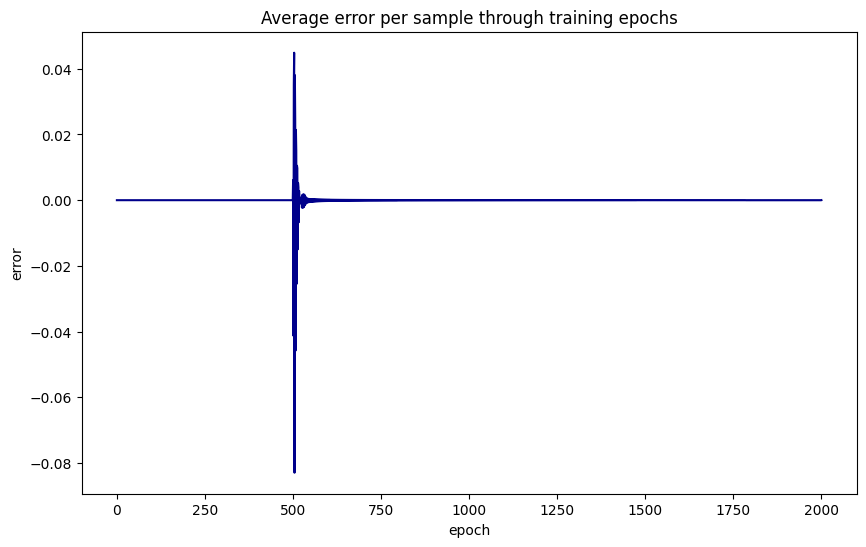

In [74]:
#network with 2 layers
net_soft = Network()
net_soft.add(FCLayer(13, 5,seed = seed))
net_soft.add(FCLayer(5, 5,seed = seed))  
net_soft.add(FCLayer(5, 5,seed = seed))  
net_soft.add(FCLayer(5, 3,seed = seed))  
net_soft.add(ActivationLayer(softmax, softmax_prime))

# train
net_soft.use(categorical_cross_entropy_prime, categorical_cross_entropy_prime)

err_vect_soft = net_soft.fit(X_train_standardized, y_train, epochs = 500,learning_rate=0.1)
net_soft.plot_error_curve(err_vect_soft)

##################################################
Accuracy on train:  1.0
Accuracy on test:  0.9722222222222222
##################################################
Recall on train:  1.0
Recall on test:  0.9722222222222222
##################################################
Precision on train:  1.0
Precision on test:  0.9722222222222222
##################################################


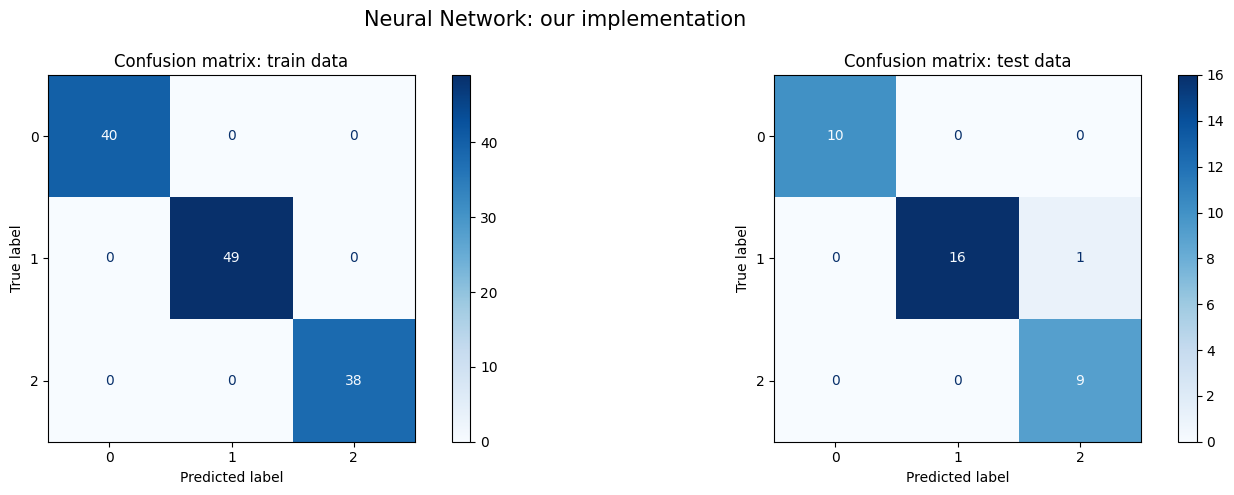

In [75]:
net_soft.nn_evaluate_one_hot(x_train= X_train_standardized, y_train=y_train, x_test=X_test_standardized, y_test=y_test, epochs=500, learning_rate=0.1)

#### Learning Rates